In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
#import data
towny=pd.read_csv('towny_df',index_col='town')
targets=pd.read_csv('target_df',index_col='town')
norm_towny=pd.read_csv('normalized_towns',index_col='town')
norm_buildings=pd.read_csv('norm_buildings_df',index_col='town')

In [4]:
#run for normalized towns (divided by population)
y = targets['income']
X = norm_towny.drop(['income','poverty','edu','age'], axis=1, inplace=False)


In [5]:
#run for normalized buildings ((res/houses) (biz/businesses) (ind/industrial))/pop
y = targets['poverty']
X = norm_buildings

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#smoting
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)
X_sm_test, y_sm_test = smote.fit_resample(X_test, y_test)

### Decision Tree

In [219]:
# {criterion= 'entropy',
#  max_depth= 5,
#  min_samples_leaf= 6,
#  min_samples_split= 5}
dt_clf = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 6,
 min_samples_split= 8)

dt_cv_score = cross_val_score(dt_clf, X_sm_train, y_sm_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 52.01%


In [203]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [204]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_sm_train, y_sm_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [205]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_sm_test, y_sm_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 64.09%
Mean Testing Score: 41.90%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

### Adaboost

In [13]:
# adaboosting time
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for AdaBoost: {adaboost_mean_cv_score :.2%}")

Mean Cross Validation Score for AdaBoost: 56.51%


### Random Forest

In [178]:
#Random Forest
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_sm_train, y_sm_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 63.42%


## model analysis

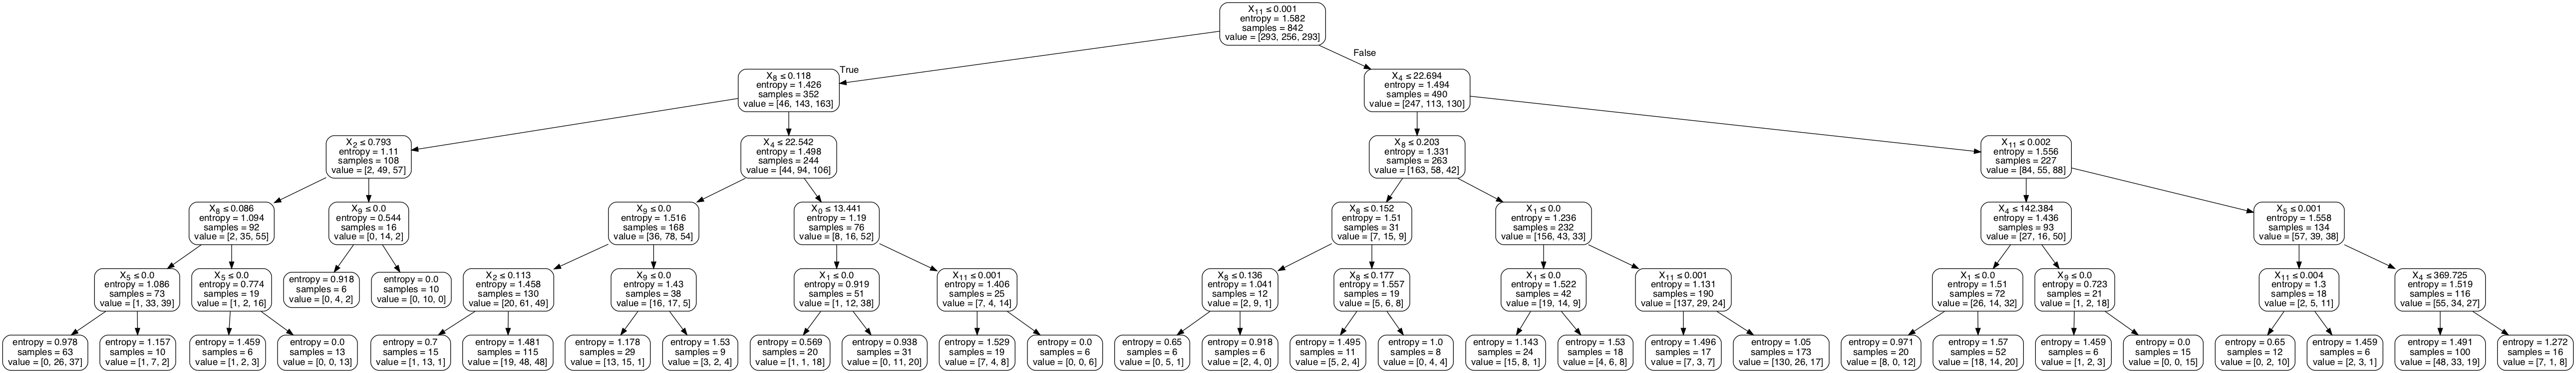

In [220]:

dt_clf.fit(X_sm_train, y_sm_train)
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
dt_clf.fit(X_train, y_train)
y_pred_class=dt_clf.predict(X_train, y_train)

print(metrics.accuracy_score(y_test, y_pred_class))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


In [221]:
##Spot-Checking Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
#testing models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_sm_train, y_sm_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.497605 (0.030256)
LDA: 0.460750 (0.043586)
KNN: 0.445365 (0.041855)
CART: 0.428762 (0.043986)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVM: 0.441822 (0.026884)
XGB: 0.509489 (0.021034)
RF: 0.495266 (0.011037)


In [225]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(7,7))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

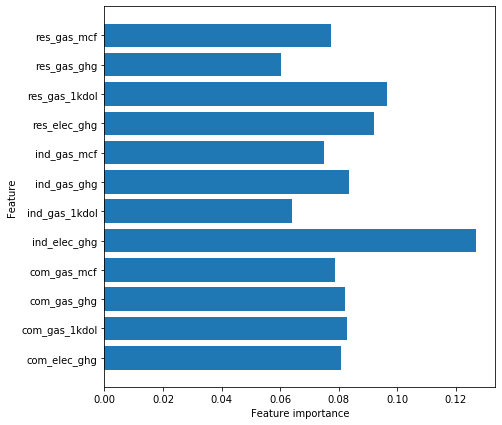

In [226]:
# X_train, X_test, y_train, y_test

dt_clf.fit(X_sm_train,y_sm_train)
plot_feature_importances(rfc)

In [222]:
y_sm_pred=dt_clf.predict(X_sm_test)

In [223]:
y_sm_pred=dt_clf.predict(X_sm_test)
cf = confusion_matrix(y_sm_test, y_sm_pred)

Confusion matrix, without normalization
[[43 23 20]
 [31 32 36]
 [21 34 44]]
Normalized confusion matrix
[[0.5  0.27 0.23]
 [0.31 0.32 0.36]
 [0.21 0.34 0.44]]


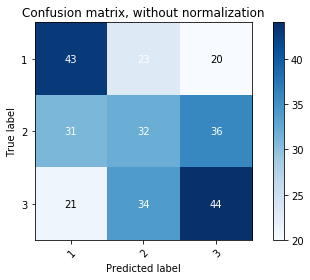

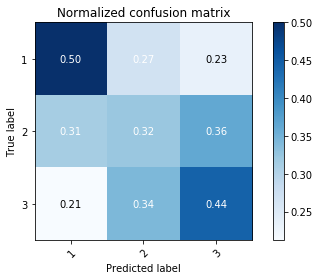

In [224]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes=[1,2,3]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names=['poor','middle','upper']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_sm_test, y_sm_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_sm_test, y_sm_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [194]:
unique_elements, counts_elements = np.unique(y_sm_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   2   3]
 [271 448 448]]


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'